In [65]:
poissonian <- function(mu, n) {
  num <- (mu ^ n) * exp(-mu)
  den <- factorial(n)

  return(num / den)
}

n_accidents <- 4
probability <- 0

for (i in 0:n_accidents) {
  probability <- probability + poissonian(2, i)
}

sprintf("P (at least 5 accidents tomorrow ): %s", 1 - probability)

[1] "P (at least 5 accidents tomorrow ): 0.0526530173437111"

In [66]:
mu <- 7
std <- 2

interval <- qnorm(0.5, mu, std)

cat(interval)

7

In [67]:
avg <- 7
stddev <- 2
confidence_level <- 0.95

r <- sqrt(1 / (1 - confidence_level))
days_in_advance <- avg + ceiling(r * stddev)

sprintf("She should order the book %s days early.", days_in_advance)

[1] "She should order the book 16 days early."

In [68]:
rate <- 1 / 30

lambda <- rate * 2 * 60

result <- 1 - dpois(0, lambda) - dpois(1, lambda) - dpois(2, lambda) - dpois(3, lambda) - dpois(4, lambda) - dpois(5, lambda) - dpois(6, lambda)

cat(result)

0.110674

In [69]:
lambda <- rate * 3 * 60

result <- dpois(0, lambda) + dpois(1, lambda) + dpois(2, lambda) + dpois(3, lambda)
cat(result)

0.1512039

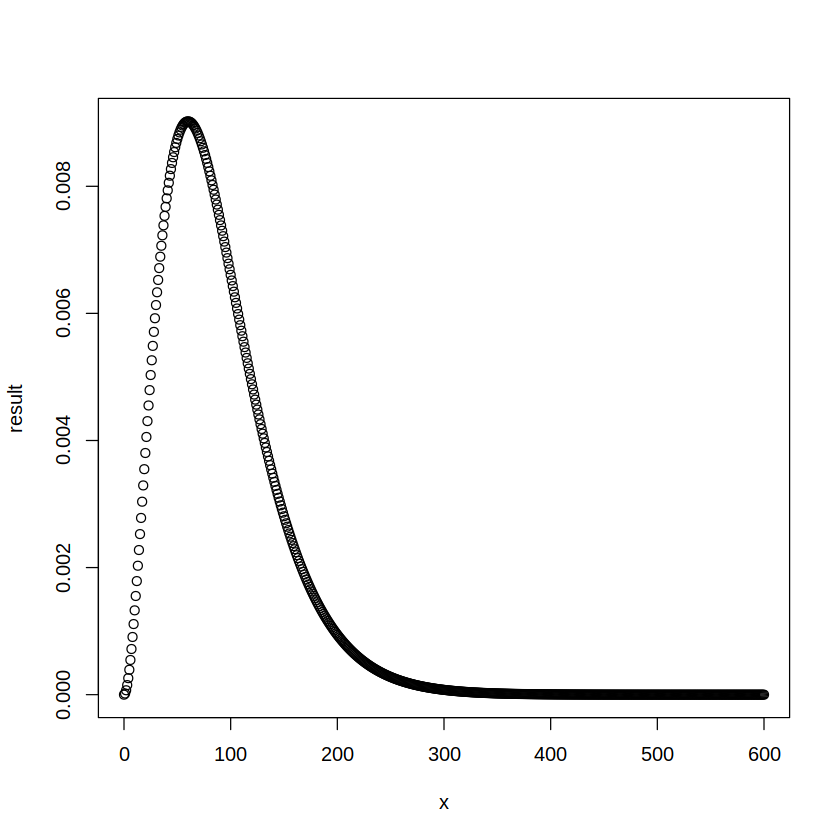

In [70]:
x <- seq(0, 600, 1)
result <- dgamma(x, 3, rate)

plot(x, result)

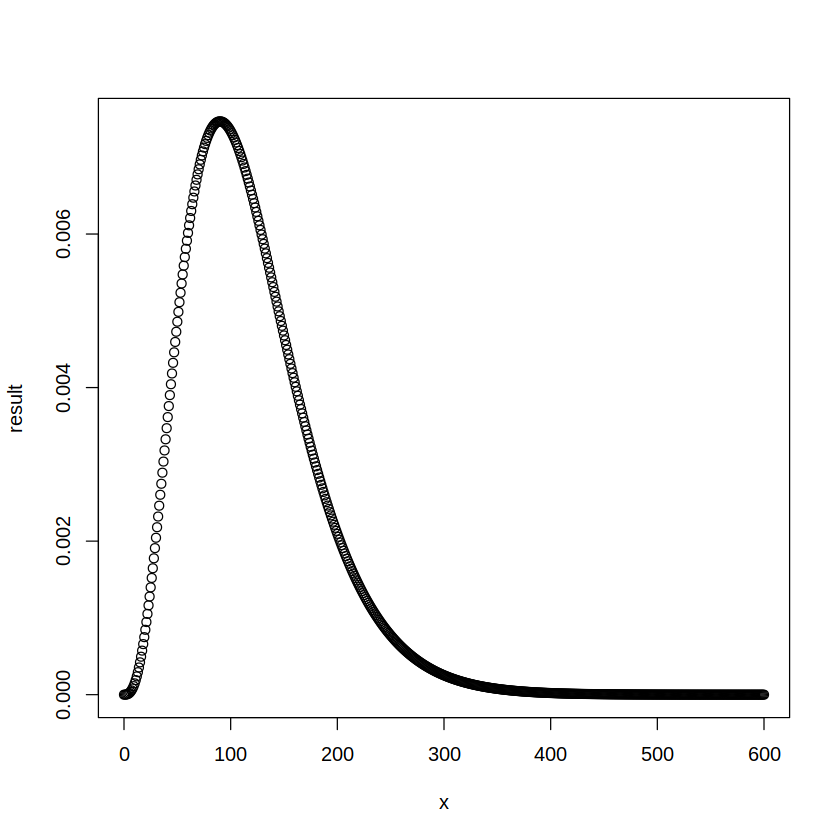

In [71]:
result <- dgamma(x, 4, rate)

plot(x, result)

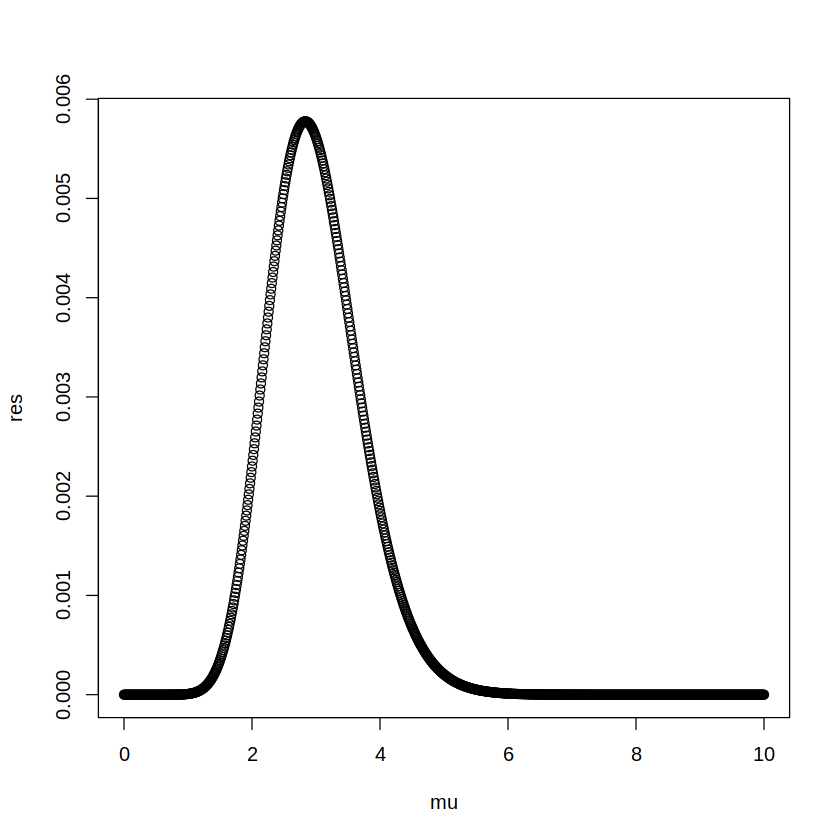

In [82]:
y <- c(4, 1, 3, 1, 5, 3)

mu <- seq(0, 10, 0.01)

alpha1 <- 1 + sum(y)
lambda1 <- length(y)
res <- dgamma(mu, alpha1, lambda1)
res <- res / sum(res)

plot(mu, res)

In [83]:
mean <- sum(mu * res)
var <- sum(mu^2 * res) - mean^2
med <- qpois(0.5, mean)

cat(mean, "\n")
cat(var, "\n")
cat(med)

3 
0.5 
3

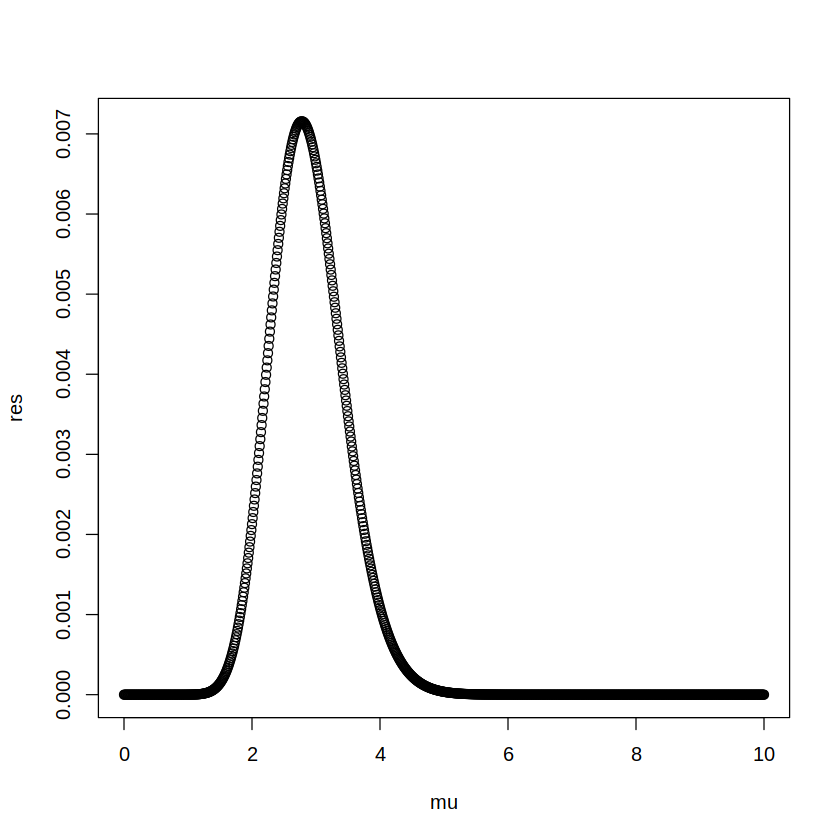

In [84]:
lambda <- 3
alpha <- 9

lambda <- lambda + length(y)
alpha <- alpha + sum(y)

res <- dgamma(mu, alpha, lambda)
res <- res / sum(res)

plot(mu, res)

In [89]:
qgamma(c(0.025, 0.975), alpha1, lambda1)
qgamma(c(0.025, 0.975), alpha, lambda)
qnorm(c(0.025, 0.975), mean = alpha / lambda, sd = alpha / lambda^2)

[1] 1.777990 4.536441

[1] 1.887118 4.100548

[1] 2.259765 3.518013

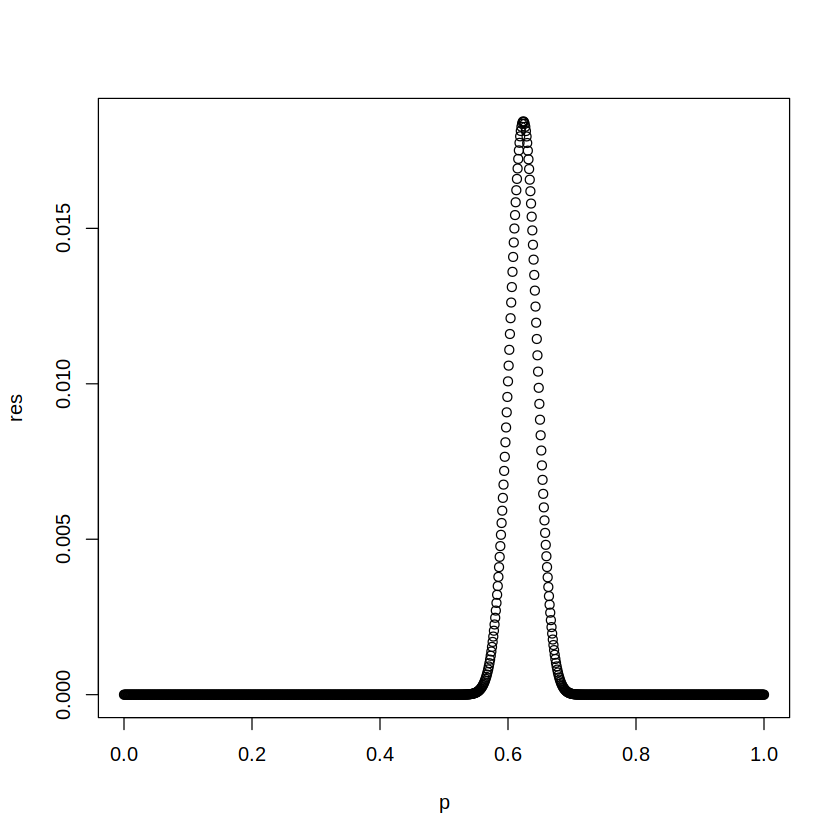

In [102]:
n <- 500
r <- 312

p <- seq(0, 1, 0.001)

alpha <- 1 + r
beta <- 1 + n - r

res <- dbeta(p, alpha, beta)
res <- res / sum(res)

plot(p, res)

In [103]:
mean <- sum(p * res)
var <- sum(p^2 * res) - mean^2

cat(mean, "\n")
cat(var)

0.623506 
0.0004666924

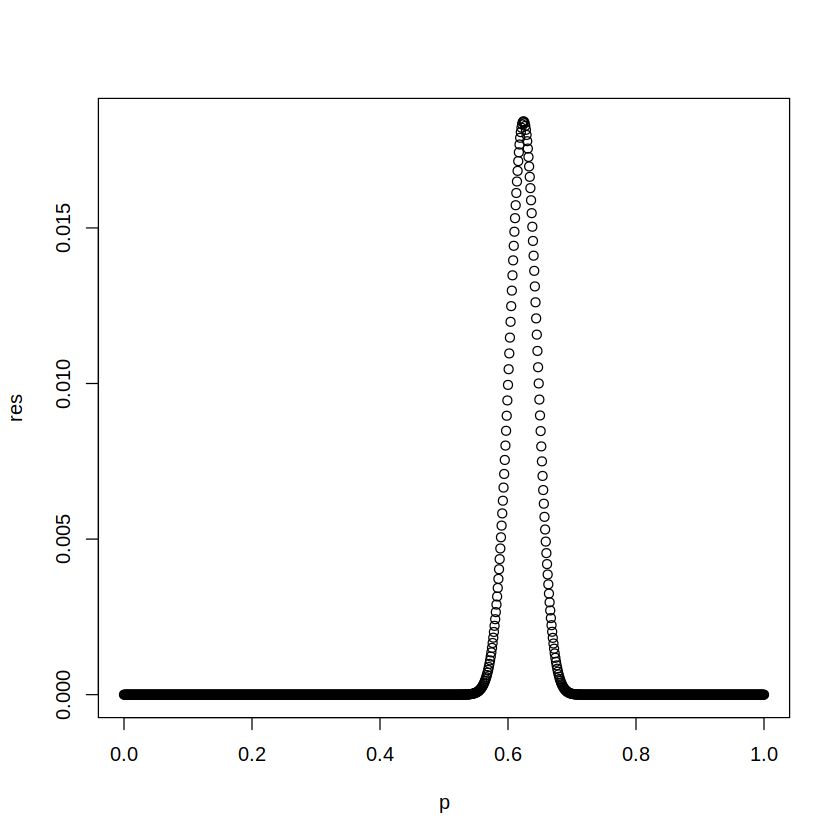

In [104]:
alpha <- 1 / 2 + r
beta <- 1 / 2 + n - r

res <- dbeta(p, alpha, beta)
res <- res / sum(res)

plot(p, res)

In [105]:
mean <- sum(p * res)
var <- sum(p^2 * res) - mean^2

cat(mean, "\n")
cat(var)

0.6237525 
0.0004675006

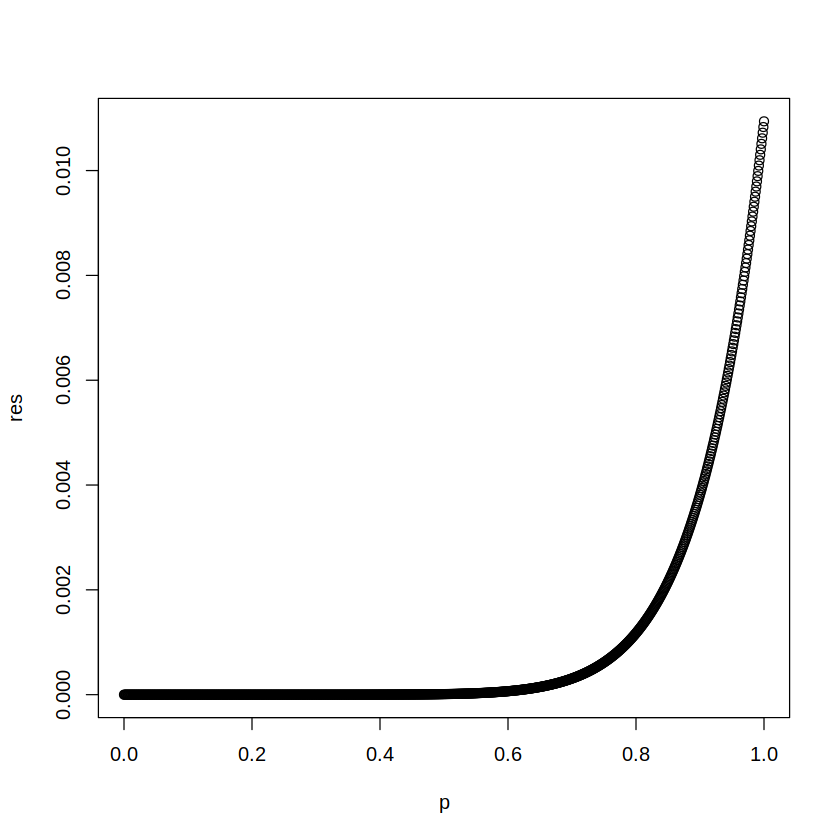

In [106]:
n <- 10
r <- 10

p <- seq(0, 1, 0.001)

alpha <- 1 + r
beta <- 1 + n - r

res <- dbeta(p, alpha, beta)
res <- res / sum(res)

plot(p, res)

In [107]:
mean <- sum(p * res)
var <- sum(p^2 * res) - mean^2

cat(mean, "\n")
cat(var)

0.9171242 
0.005881865

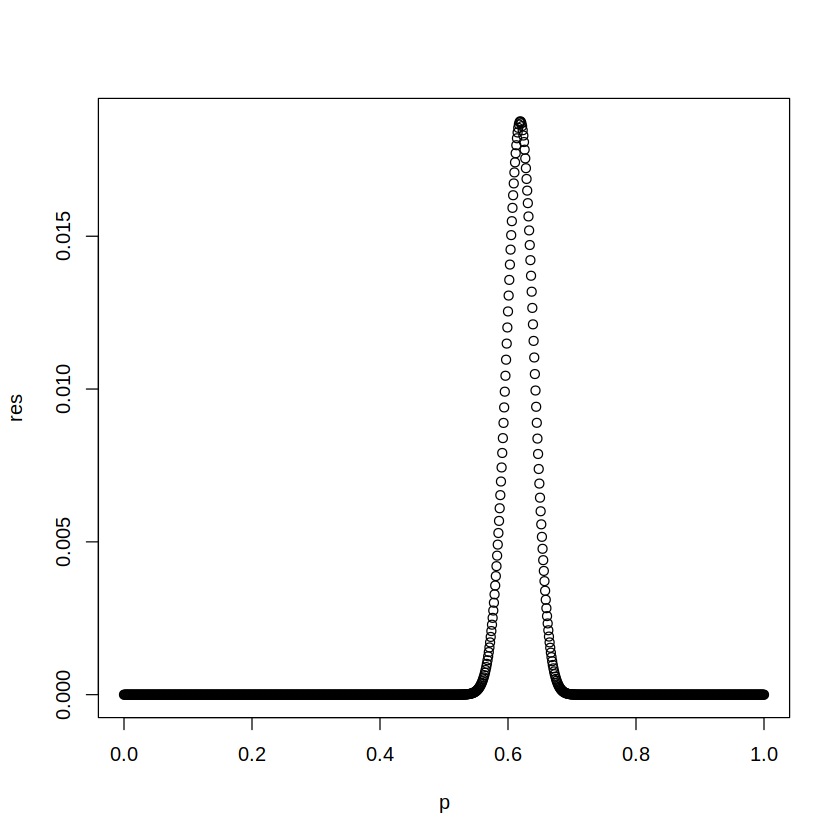

In [109]:
n <- 500
r <- 312

alpha1 <- alpha + r
beta1 <- alpha + n - r

res <- dbeta(p, alpha1, beta1)
res <- res / sum(res)

plot(p, res)

In [110]:
qbeta(c(0.025, 0.975), alpha1, beta1)

[1] 0.5767364 0.6599494

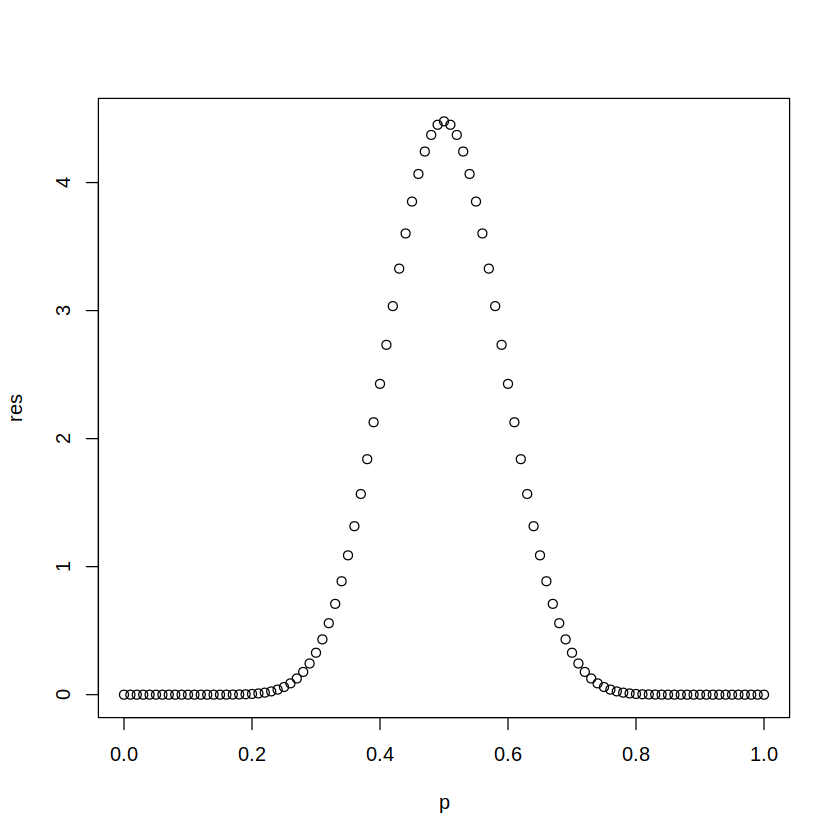

In [112]:
data <- c(1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 1, 0, 0, 0)

n_coin <- length(data)
r_coin <- sum(data)

a <- 1
b <- 1

a <- a + r_coin
b <- b + n_coin - r_coin

p <- seq(0, 1, 0.01)

res <- dbeta(p, a, b)
plot(p, res)

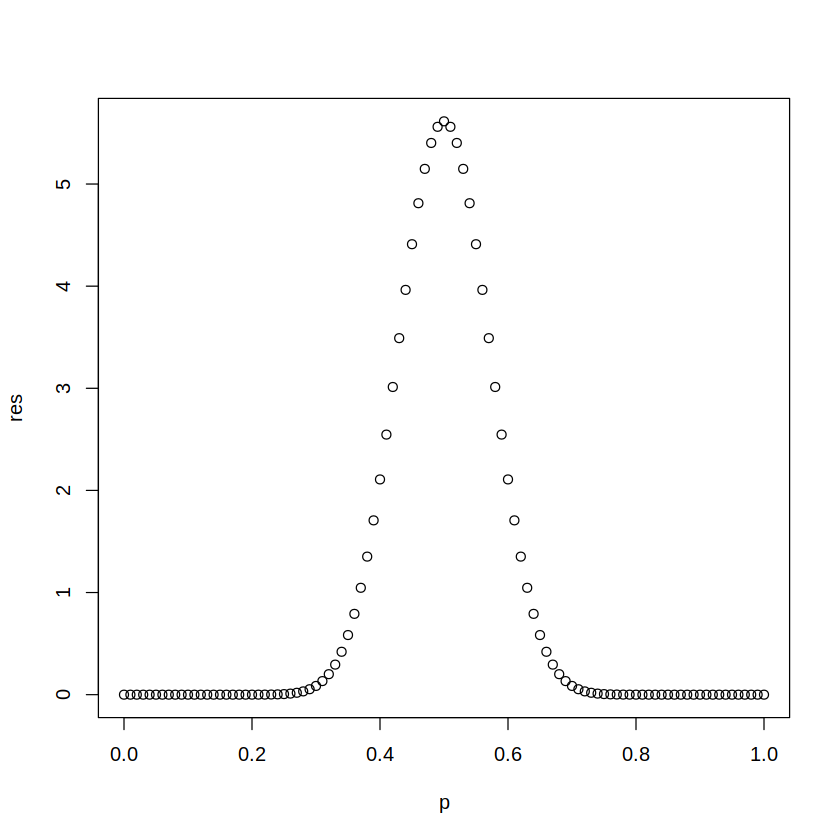

In [115]:
a <- 10
b <- 10

a <- a + r_coin
b <- b + n_coin - r_coin

p <- seq(0, 1, 0.01)

res <- dbeta(p, a, b)
plot(p, res)

In [121]:
qbeta(0.5, a, b)
qbeta(c(0.025, 0.975), a, b)

[1] 0.5

[1] 0.3633783 0.6366217

0.2554901 0.3187561 


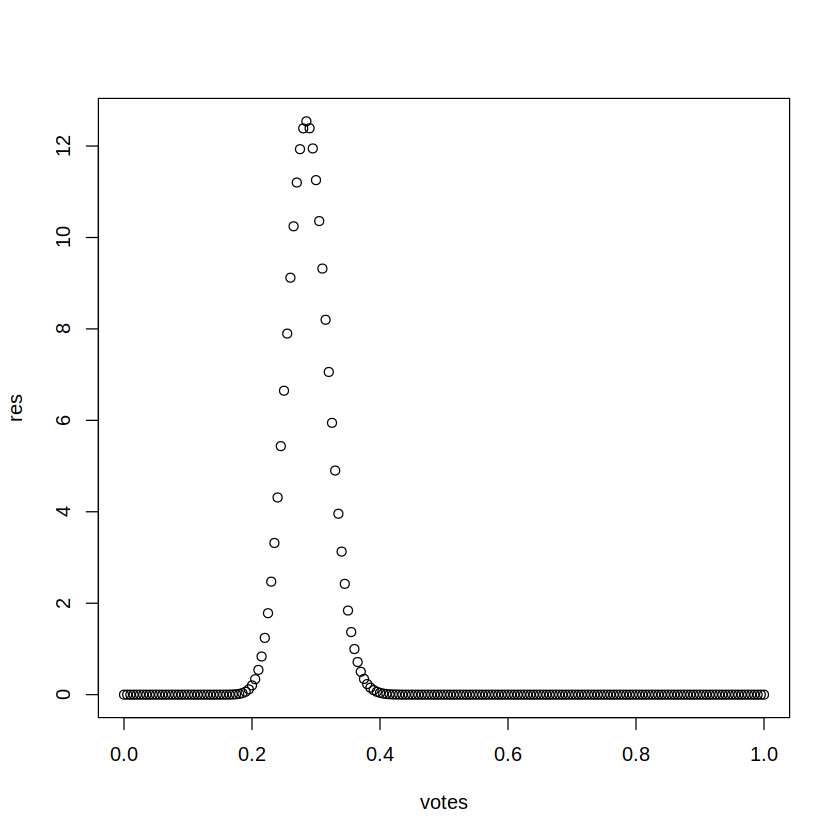

0.132933 0.1838813 


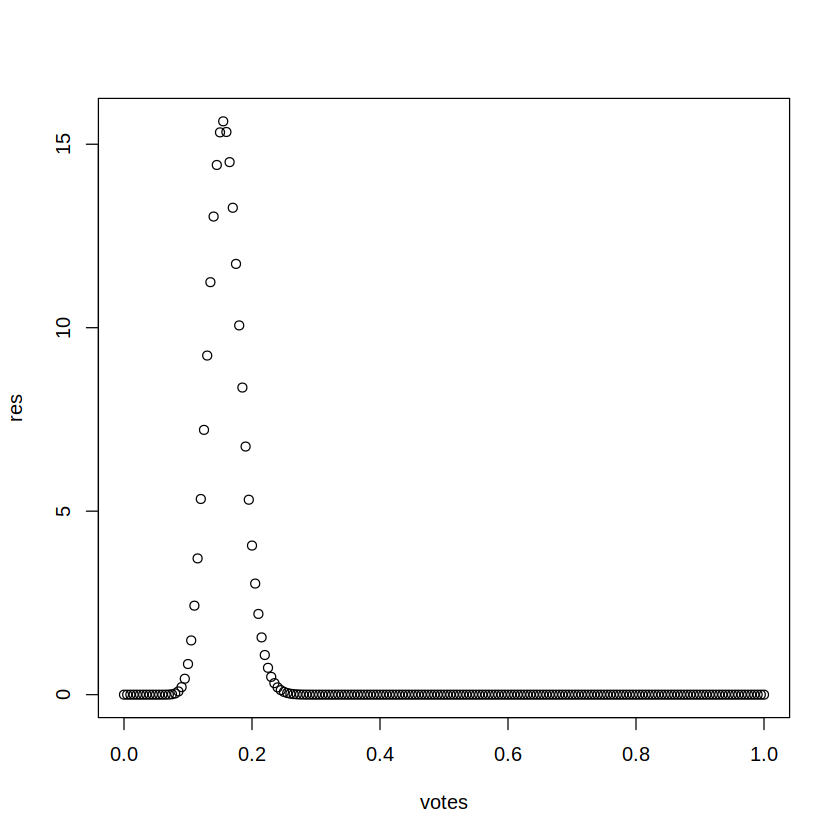

0.1984137 0.2570177 


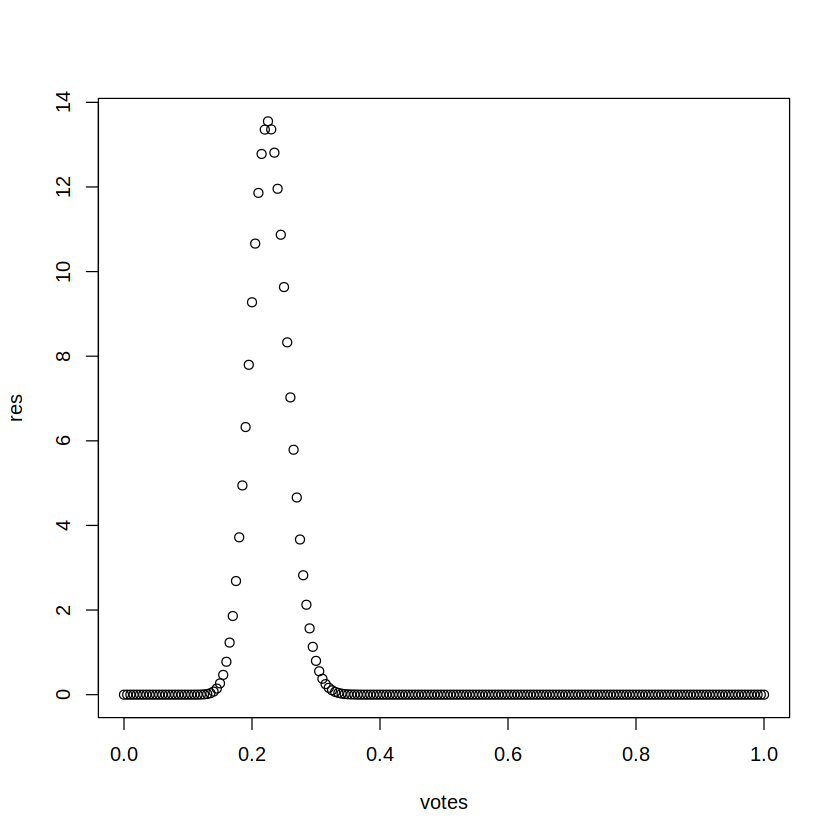

0.3035773 0.3696814 


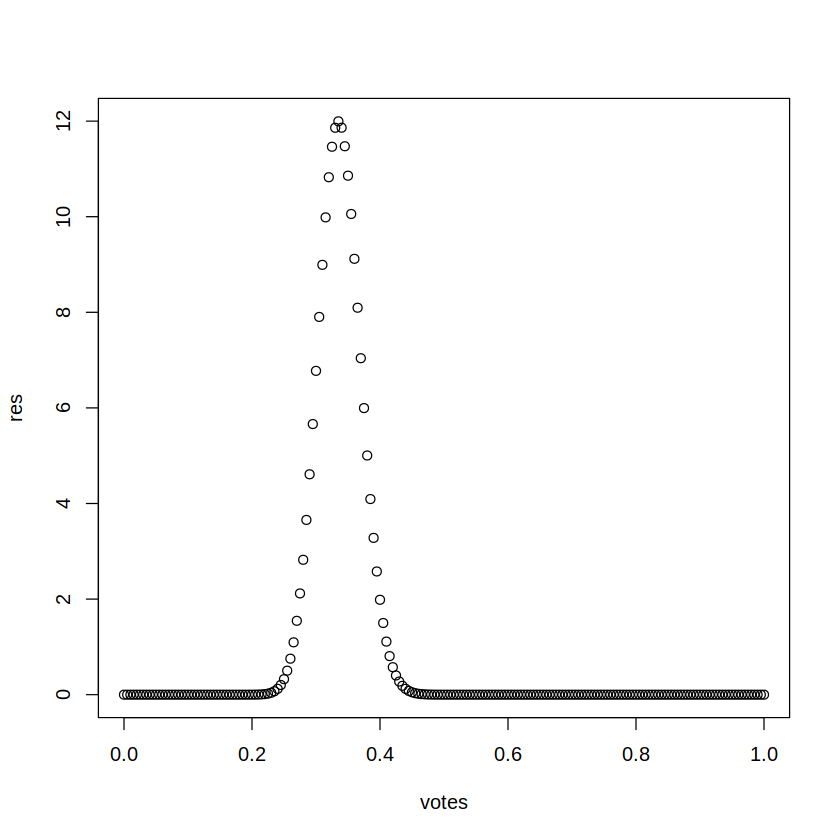

In [134]:
n_voters <- 200
prefs <- c(57, 31, 45, 67)

votes <- seq(0, n_voters, 1) / n_voters


for (i in 1:4){
  a <- 1 + prefs[i]
  b <- 1 + n_voters - prefs[i]
  res <- dbeta(votes, a, b)
  plot(votes, res)
  cat(qbeta(c(0.16, 1 - 0.16), a, b), "\n")
}


0.2718466 0.3241718 


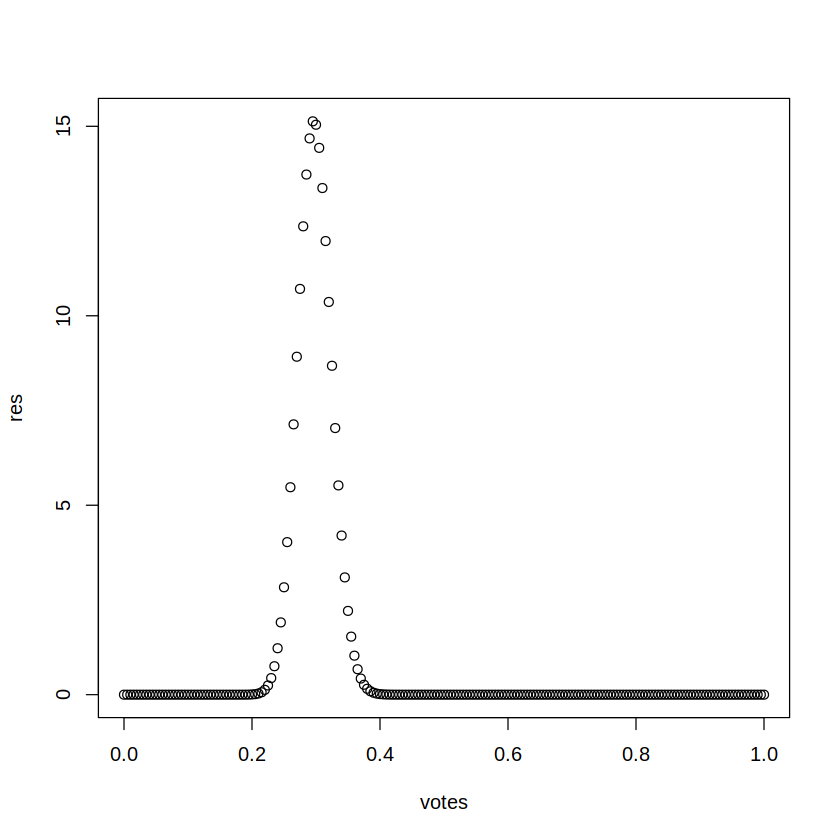

0.1317912 0.172831 


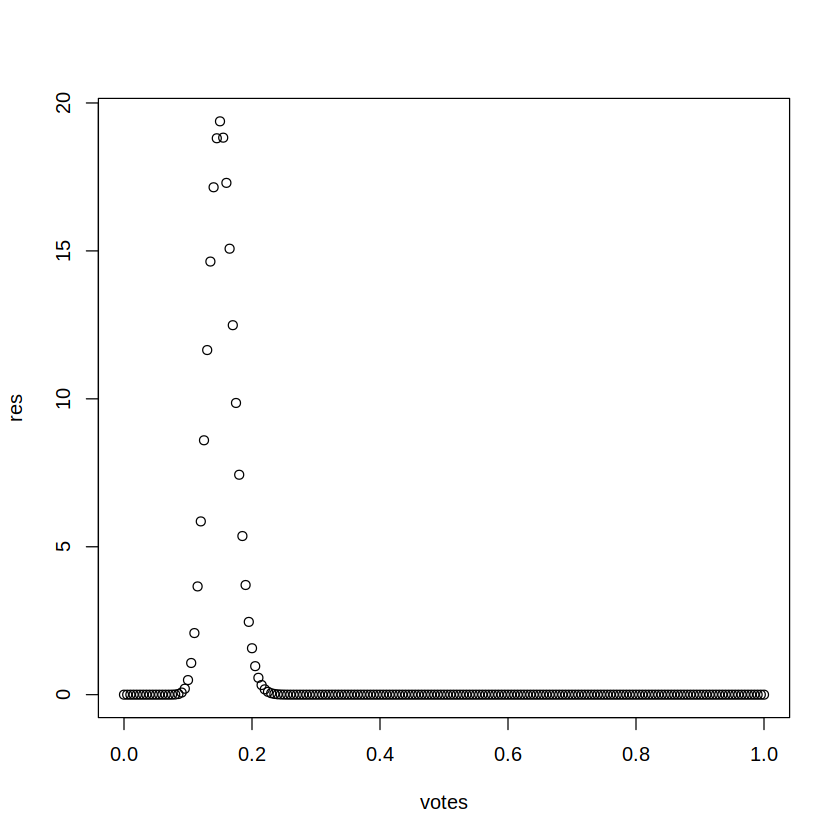

0.2140415 0.2627693 


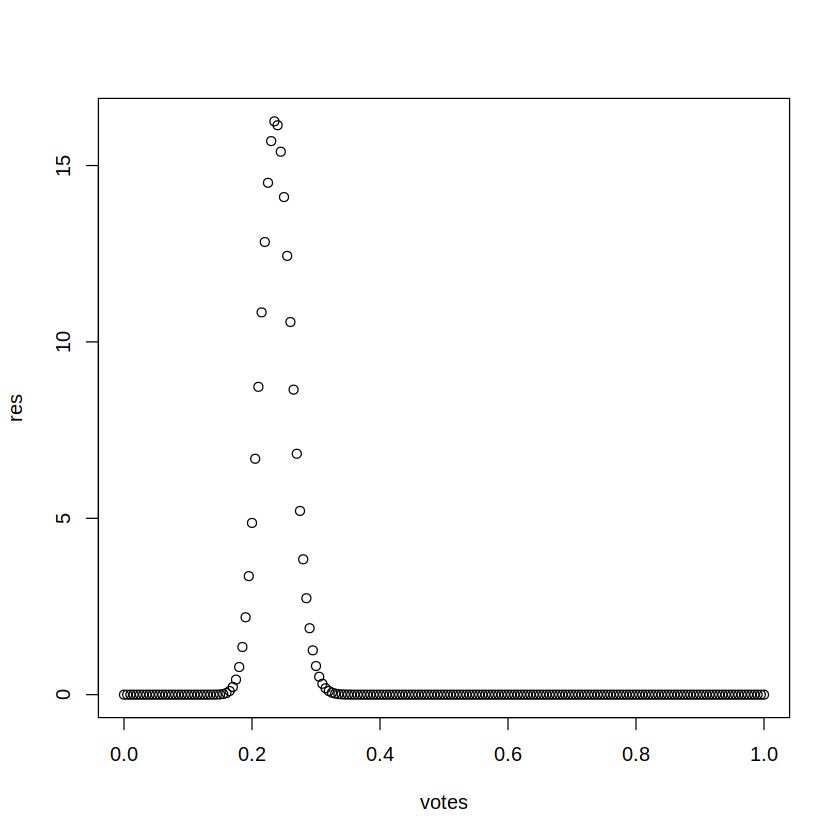

0.2912392 0.3445151 


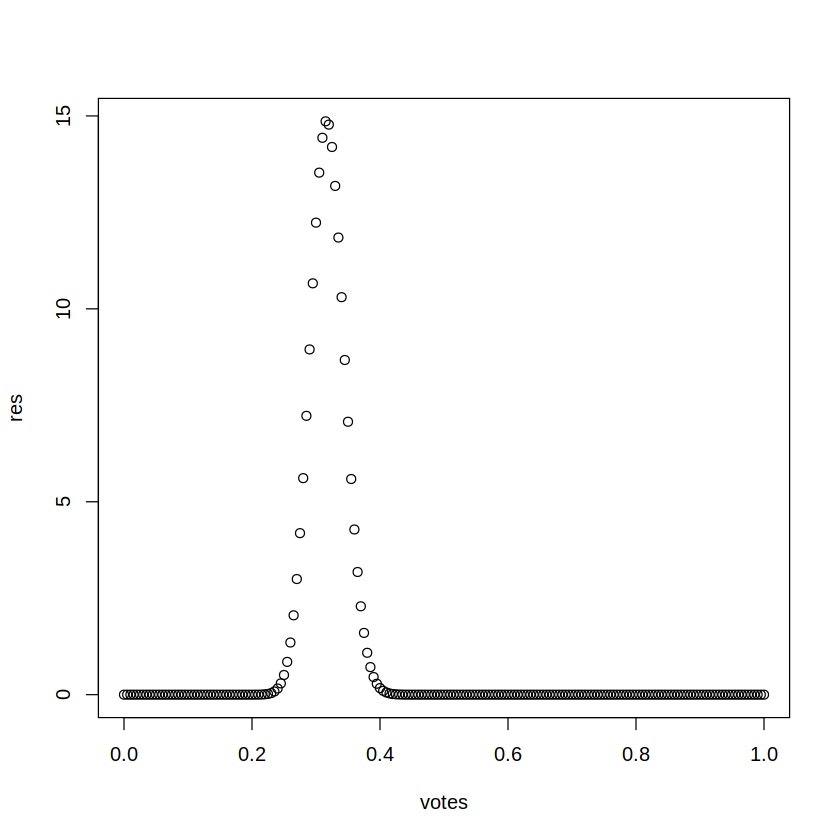

In [135]:
n_voters <- 200
prefs <- c(57, 31, 45, 67)
prev_n_voters <- 100
prev_prefs <- c(32, 14, 26, 28)

votes <- seq(0, n_voters, 1) / n_voters

for (i in 1:4){
  a <- 1 + prev_prefs[i] + prefs[i]
  b <- 1 + n_voters + prev_n_voters - prefs[i] - prev_prefs[i]
  res <- dbeta(votes, a, b)
  plot(votes, res)
  cat(qbeta(c(0.16, 1 - 0.16), a, b), "\n")
}

In [137]:
n <- 75
p0 <- 0.15
y <- 6

p <- y / n
cat(p)

0.08

0.08478674 
0.0009520625

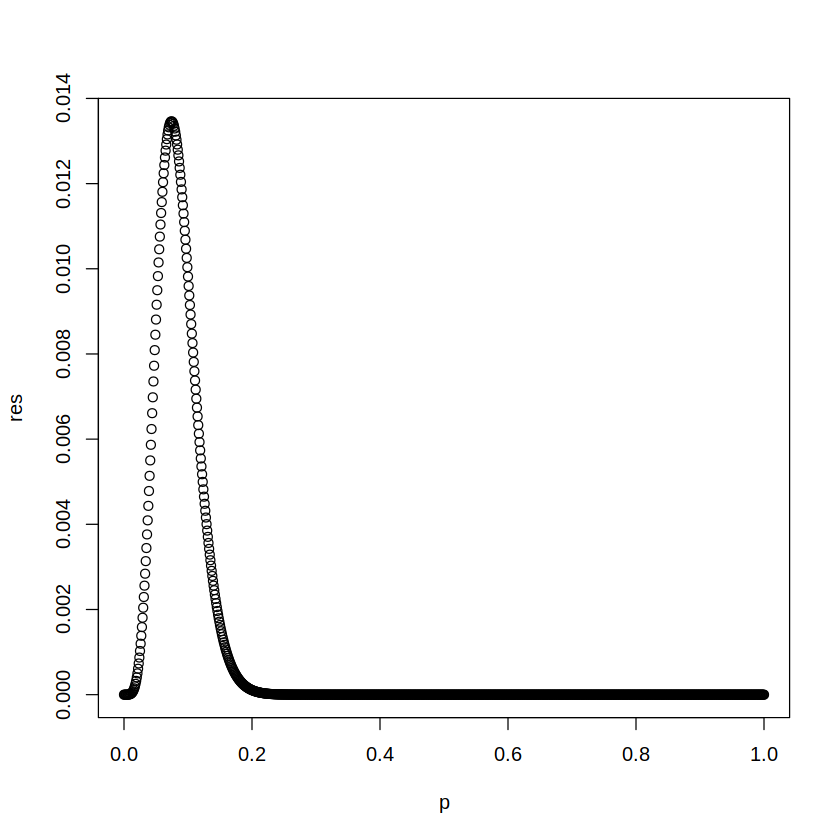

In [150]:
mu <- 0.15
sigma <- 0.14

alpha <- mu * (((mu * (1 - mu)) / sigma**2) - 1)
beta <- alpha * ((1 / mu) - 1)

alpha <- alpha + y
beta <- beta + n - y

p <- seq(0, 1, 0.001)

res <- dbeta(p, alpha, beta)
res <- res / sum(res)

mean <- sum(res * p)
var <- sum(res * p^2) - mean^2

cat(mean, "\n")
cat(var)

plot(p, res)

In [173]:
1 - pbeta(0.15, alpha, beta) < 0.05

[1] TRUE

In [170]:
dbinom(6, 75, 0.15) < 0.05

[1] TRUE